### Jaishree Joshita

# Task 3 - Exploratory Data Analysis - Retail

we have to perform a exploratory data analysis on the given dataset (can be found at https://bit.ly/3i4rbWl) of SampleSuperstore. we will try to find out the weak areas that needs to work upon to enhance profit and problems associated with business while exploring the data.

#### Tachnical Slack - Numpy, Matplotlib, Pandas and Seaborn

In [47]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading the Dataset

In [48]:
df = pd.read_csv('SampleSuperstore.csv') #loaded the dataset from the saved folder
print("Data Imported Successfully")

Data Imported Successfully


In [49]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [50]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [51]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [53]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [54]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [55]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [56]:
df.shape

(9994, 13)

In [57]:
df.duplicated().sum()

17

In [58]:
df.drop_duplicates(subset=None, keep = 'first',inplace=True)
df.duplicated().sum()

0

In [59]:
#df['Postal Code'] = df['Postal Code'].astype('object') #making postal code as object
#df = df.drop(['Postal Code'],axis = 1) #dropping the postal code

## Analyzing of dataset through various tools and techniques -

### I. Driving Graphically the relationship between Sales and Profit via seaborn technique--

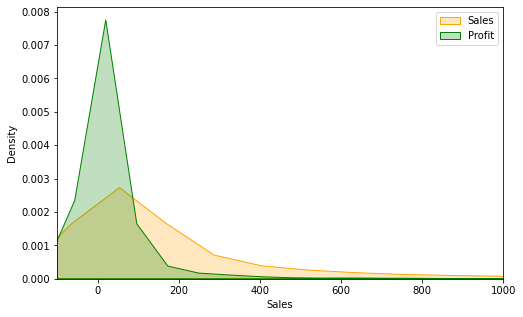

In [60]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Sales'],color = 'orange', label="Sales",shade =True)
sns.kdeplot(df['Profit'],color = 'green', label="Profit",shade =True)
plt.xlim([-100,1000])
plt.legend()
plt.show()

*Analysis --- As we can see graphically, profit density is higher than that of sales but at some part there are sales but profit margin is quite low so improving those areas could increase the profit margins.*

### II. Analyzing the Columns(*Category, Region, and Segment*) of dataset (United States) via pairplot tool of Seaborn technique--

#### (A) Based on Category --

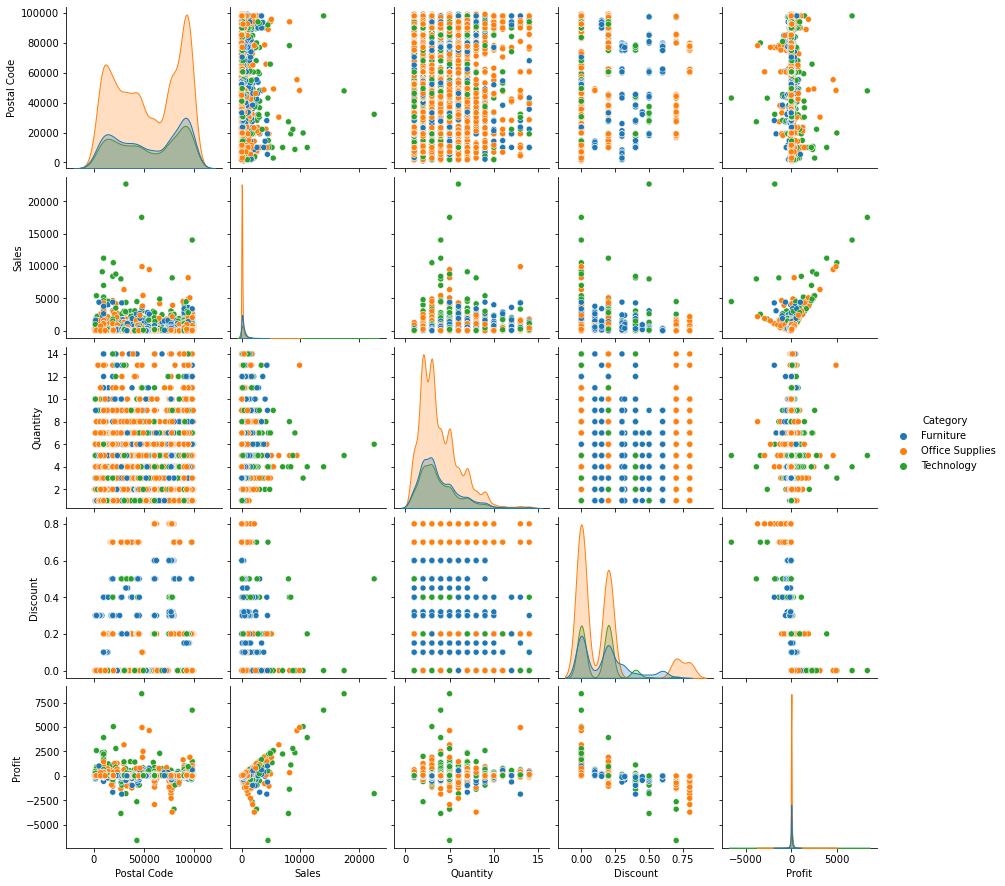

In [61]:
sns.pairplot(df, hue = 'Category')
plt.show()

#### (B) Based on Region--

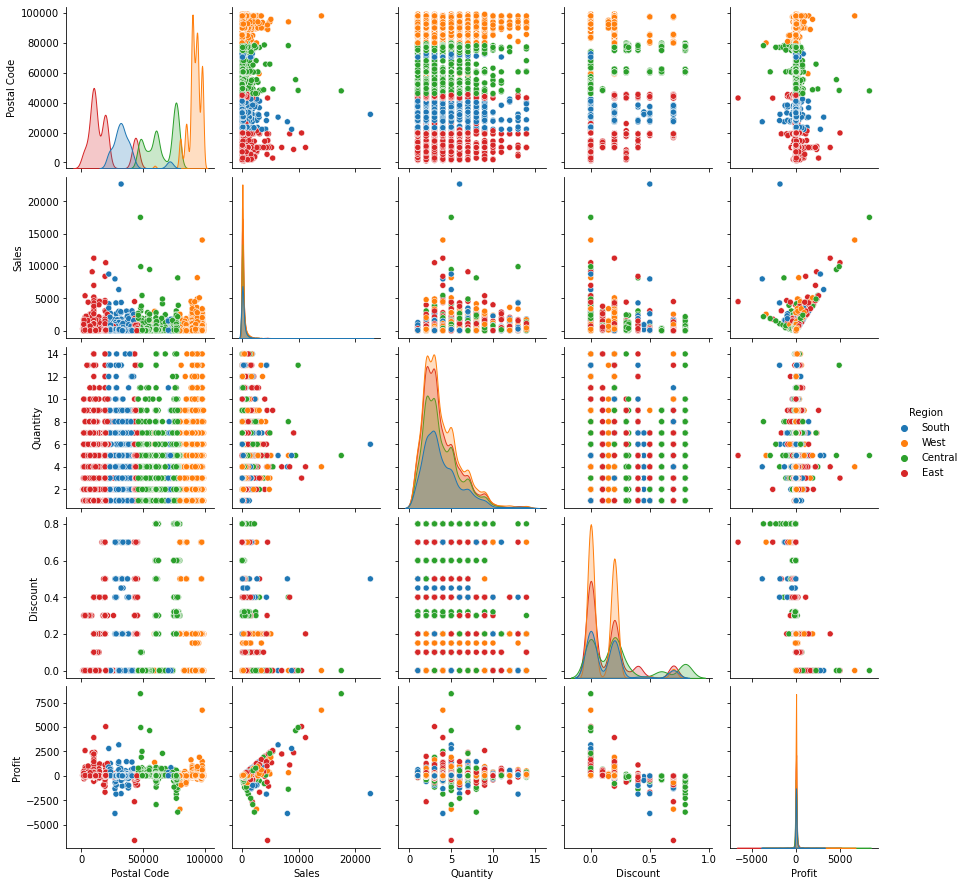

In [62]:
sns.pairplot(df,hue = 'Region')
plt.show()

#### (C) Based on Segment--

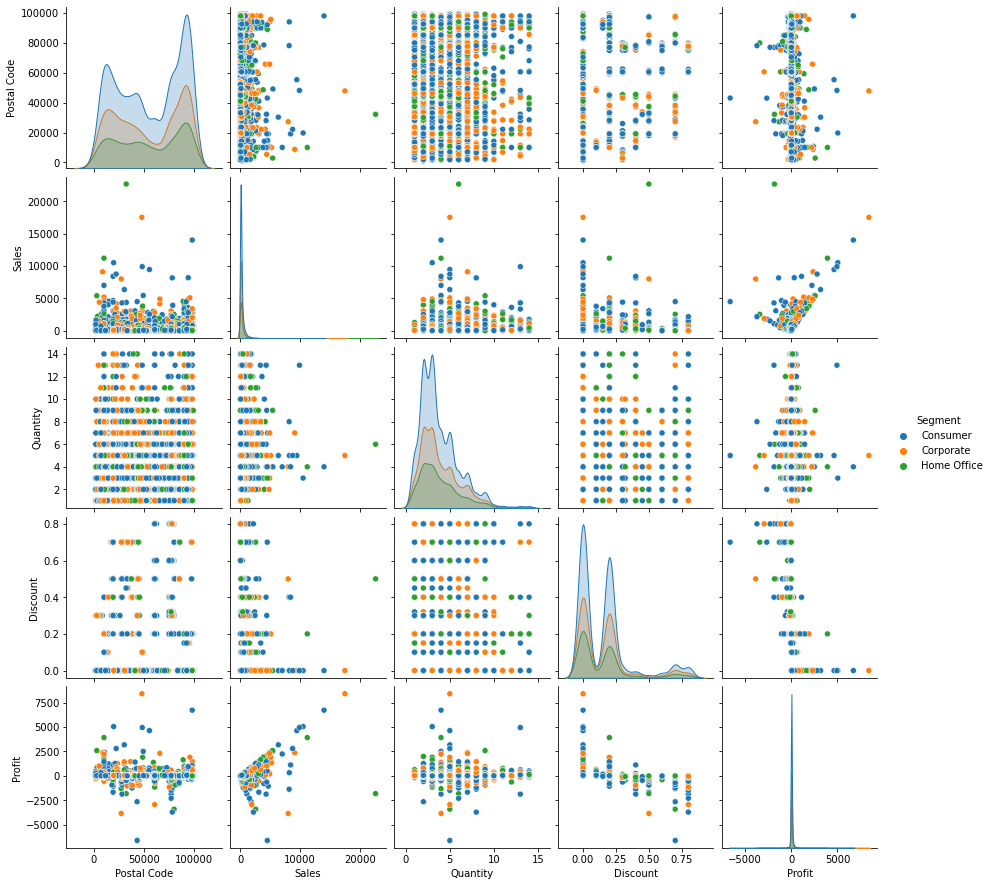

In [63]:
sns.pairplot(df,hue='Segment')
plt.show()

### III. Analyzing the correlation among the columns --

In [64]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


#### Heatmap for Correlation via seaborn technique --

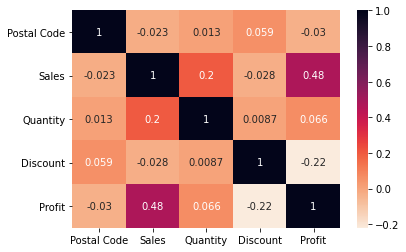

In [65]:
sns.heatmap(df.corr(),cmap='rocket_r',annot = True)
plt.show()

*Analysis-- Here, we can see that :-*

*(a) Sales and Profit are moderately correlated.*

*(b) Discount and Profit are negative correlated.*

*(c) Quantity and Profit are less moderately correlated.*

*(d) Sales and discount are negatively correlated which means there is less discount during festive seasons..*

*(e) Sales and Quantity are also less correlated i.e. sales are not occuring on regular basis due to certain reasons such       as, demand of the product is not high..* 


### IV. Analyzing the columns (*Catogory, Discount, Quantity, Region, Segment, Shipment and Sub-Category*) via Countplot of Seaborn Technique --

#### (A) Category, Region, Segment, and Shipment -

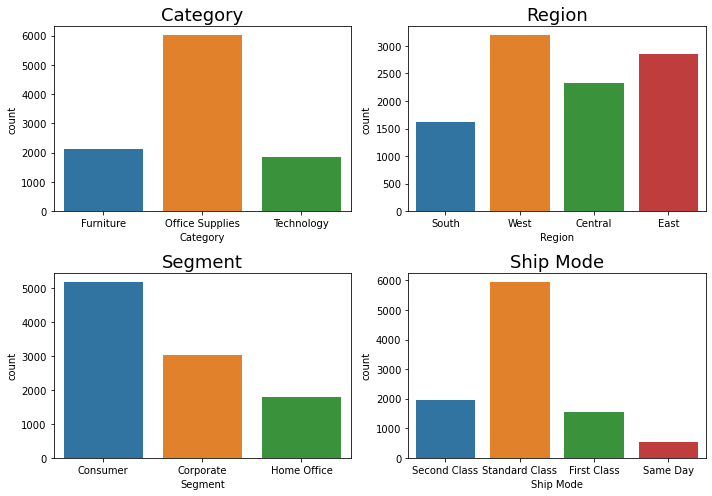

In [66]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(10,7))

sns.countplot(df['Category'],ax=axs[0][0])
sns.countplot(df['Region'],ax=axs[0][1])
sns.countplot(df['Segment'],ax=axs[1][0])
sns.countplot(df['Ship Mode'],ax=axs[1][1])

axs[0][0].set_title('Category',fontsize =18)
axs[0][1].set_title('Region',fontsize =18)
axs[1][0].set_title('Segment',fontsize =18)
axs[1][1].set_title('Ship Mode',fontsize =18)

plt.tight_layout()


#### (B) Sub - Category 

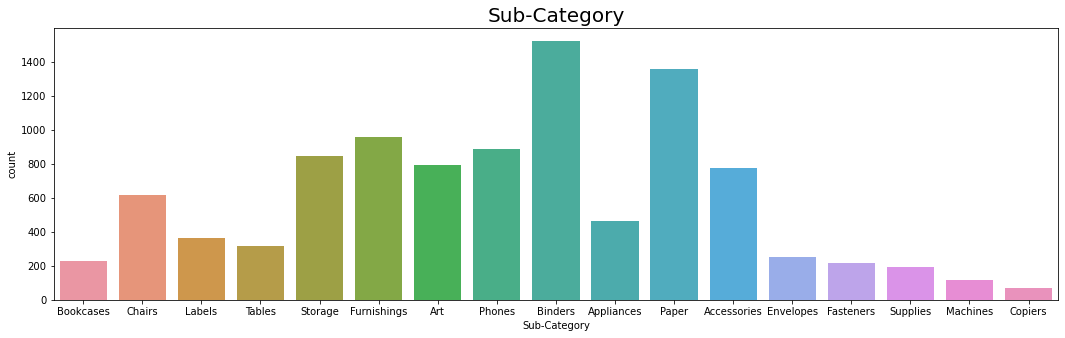

In [67]:
plt.figure(figsize=(18,5))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category', fontsize=20)
plt.show()

In [68]:
df['Sub-Category'].value_counts() #binders are highest and copiers are the lowest.

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

#### (C) Quantity

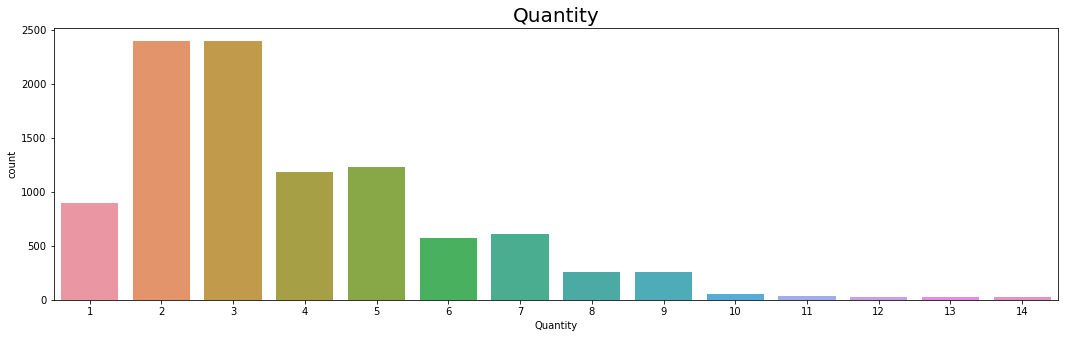

In [69]:
plt.figure(figsize=(18,5))
sns.countplot(df['Quantity'])
plt.title('Quantity', fontsize=20)
plt.show()

In [70]:
df['Quantity'].value_counts() #Analysis-- 3 are highest by one unit followed by 2 while 12 is the lowest. 
#which means most consumers tend to buy quantity of 3 and 2, least prefer to 12.

3     2400
2     2399
5     1230
4     1186
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

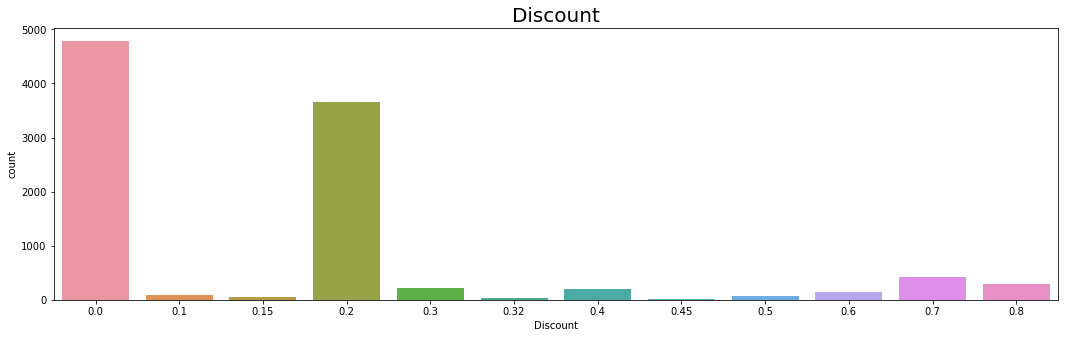

In [71]:
plt.figure(figsize=(18,5))
sns.countplot(df['Discount'])
plt.title('Discount', fontsize=20)
plt.show()

In [72]:
df['Discount'].value_counts() 
#Analysis, in most of the cases, the discount is not given. and if given then, it is of max 20%. 
#sometimes, they gave 70% if the product get old with time, otherwise,no.

0.00    4787
0.20    3653
0.70     418
0.80     299
0.30     226
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

### V. Analyzing based on the distribution of the data via displot of Seaborn technique--

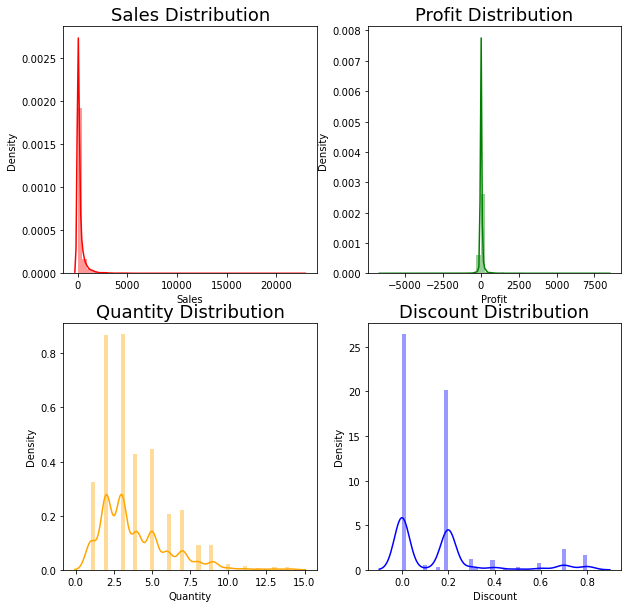

In [73]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

sns.distplot(df['Sales'],color ='red',ax=axs[0][0])
sns.distplot(df['Profit'],color='green',ax=axs[0][1])
sns.distplot(df['Quantity'],color='orange',ax=axs[1][0])
sns.distplot(df['Discount'],color ='blue',ax=axs[1][1])

axs[0][0].set_title('Sales Distribution',fontsize =18)
axs[0][1].set_title('Profit Distribution',fontsize =18)
axs[1][0].set_title('Quantity Distribution',fontsize =18)
axs[1][1].set_title('Discount Distribution',fontsize =18)


plt.show()


### VI. Statewise Deal Analysis--

In [74]:
df['Country'].value_counts()

United States    9977
Name: Country, dtype: int64

In [75]:
df1 =df['State'].value_counts()
df1

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

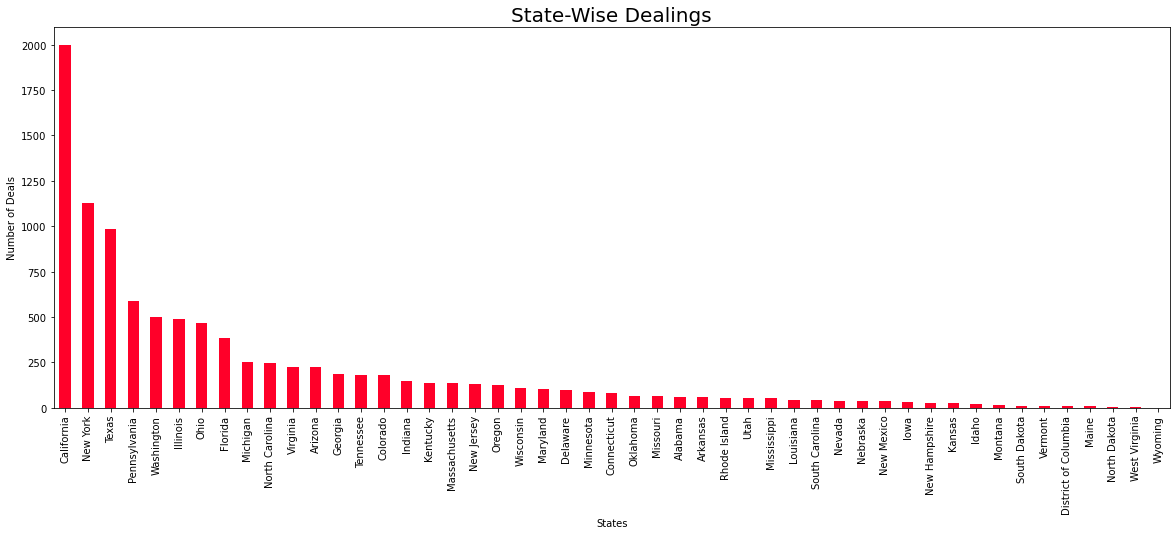

In [76]:
df1.plot(kind ='bar',colormap ='gist_rainbow',figsize=(20,7))
plt.ylabel('Number of Deals')
plt.xlabel('States')
plt.title('State-Wise Dealings',fontsize=20)
plt.show()

*Analysis - Top 3 states that deals highly frequently are - California(1996) followed by NY(1127) and Texas(983) and the least deal occurs in the Wyonming(1)*

In [77]:
#Avg no. of deal per state -- is 204
df['State'].value_counts().mean()

203.6122448979592

### VII. State-Wise Sales' Analysis of Discount, Profit, and Sales via Pieplot of Matplotlib technique--

In [80]:
df_state=df.groupby(['State'])[['Sales','Discount','Profit']].mean()
df_state.head()

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,229.246629,0.072946,38.241878
Colorado,176.418231,0.316484,-35.867351


#### (A) State-wise Profit Analysis :- 

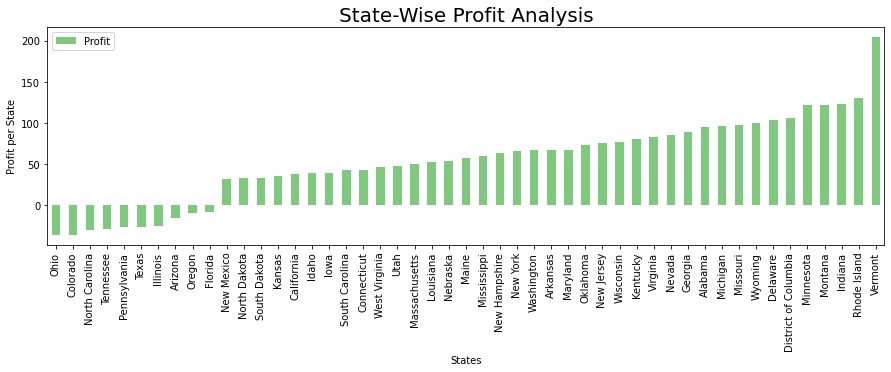

In [83]:
df_state1 = df_state.sort_values('Profit')
df_state1[['Profit']].plot(kind='bar',colormap ='Accent',figsize=(15,4))
plt.ylabel('Profit per State')
plt.xlabel('States')
plt.title('State-Wise Profit Analysis', fontsize =20)
plt.show()

*Analysis - (i) Vermont: Highest Profit ; (ii) Ohio: Lowest Profit*

#### (B) State-Wise Analysis of Sales ---

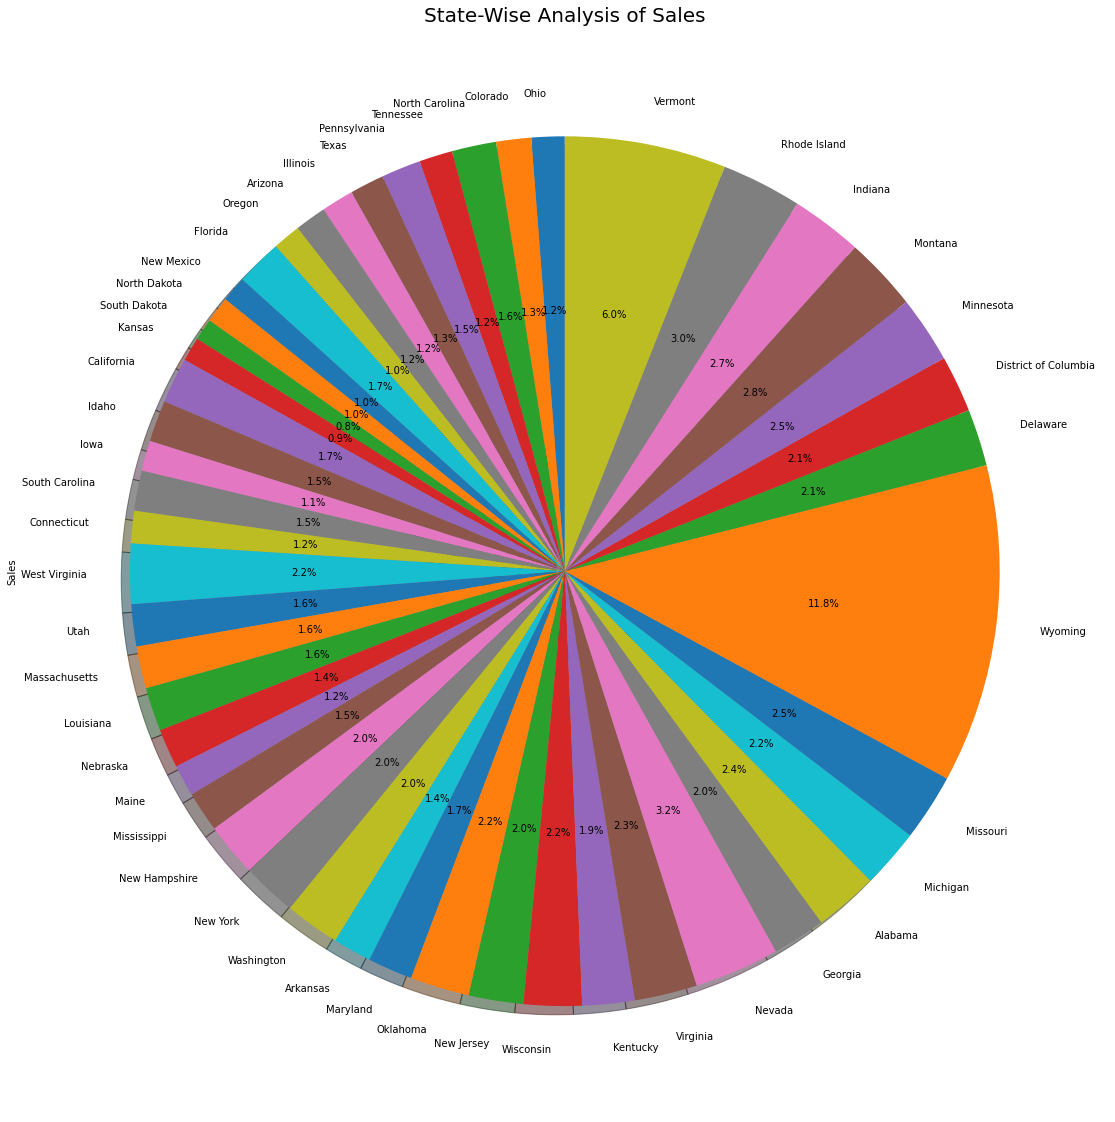

In [84]:
df_state1['Sales'].plot(kind = 'pie',figsize =(20,20), autopct ='%1.1f%%', startangle =90, shadow=True)
plt.title('State-Wise Analysis of Sales', fontsize =20)
plt.show()

*Analysis - (i) Highest Amount of Sales : Wyoming(11.8%), however it has the lowest deal amongst other cities ; (ii) Lowest Amount of Sales : South Dakota(0.8%)*

#### (C) State-Wise Discount Analysis --

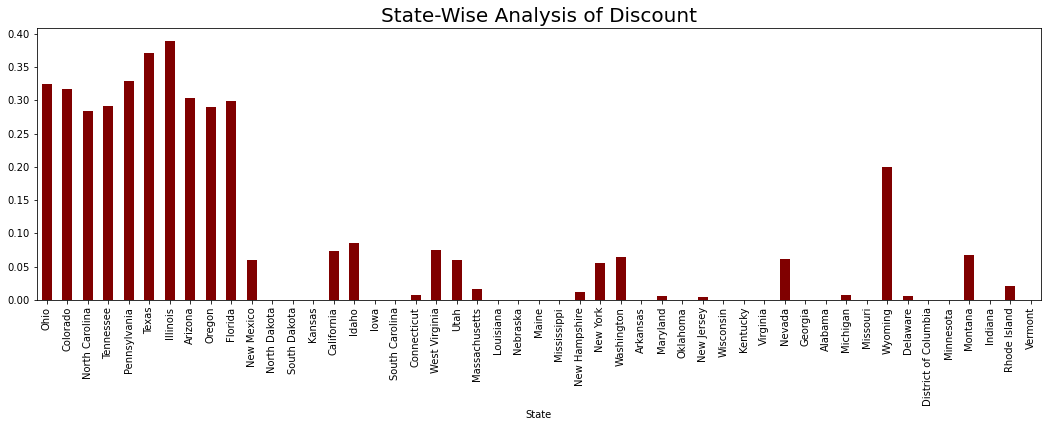

In [85]:
df_state1['Discount'].plot(kind='bar', colormap ='jet_r',figsize=(18,5))
plt.title('State-Wise Analysis of Discount', fontsize=20)
plt.show()

*Analysis-- Illinois gives the highest discount approx 38% on products.*

### VIII. City-wise Analysis of the dealings--

In [86]:
df2 = df['City'].value_counts()
df2=df2.head(25)
df2

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
Houston          375
Chicago          313
Columbus         221
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          114
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Arlington         60
San Antonio       59
Miami             57
Louisville        57
Rochester         53
Name: City, dtype: int64

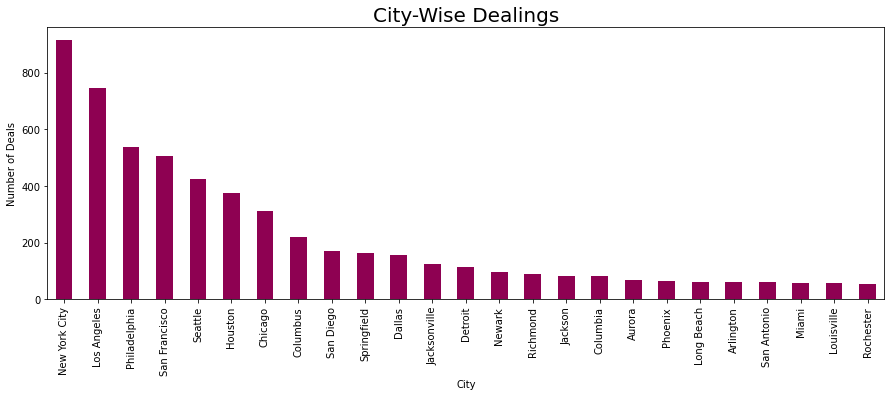

In [87]:
df2.plot(kind ='bar',colormap='PiYG',figsize =(15,5))
plt.ylabel('Number of Deals')
plt.xlabel('City')
plt.title('City-Wise Dealings', fontsize =20)
plt.show()

In [88]:
df['City'].value_counts().mean() 

#avg no. of deal per city is 19.

18.789077212806028

*Analysis- Top 3 cities where deals are the highest-- NewYork(915),Los Angeles(747),and Philadelphia(537).*

### IX. City-Wise Analysis of the Profit, sales and Discount --

In [89]:
df_city = df.groupby(['City'])[['Profit','Sales','Discount']].mean()
df_city= df_city.sort_values('Profit')
df_city.head()

,Profit,Sales,Discount
City,,,
Bethlehem,-200.619160,337.926800,0.380000
Champaign,-182.352000,151.960000,0.600000
Oswego,-178.709200,107.326000,0.600000
Round Rock,-169.061614,693.436114,0.274286
Lancaster,-157.371052,215.031826,0.315217


In [90]:
df_city.tail()

,Profit,Sales,Discount
City,,,
Appleton,277.383150,835.655000,0.0
Minneapolis,296.721070,733.501739,0.0
Lafayette,323.173794,807.619355,0.0
Independence,487.831500,1208.685000,0.0
Jamestown,642.885750,2354.395000,0.0


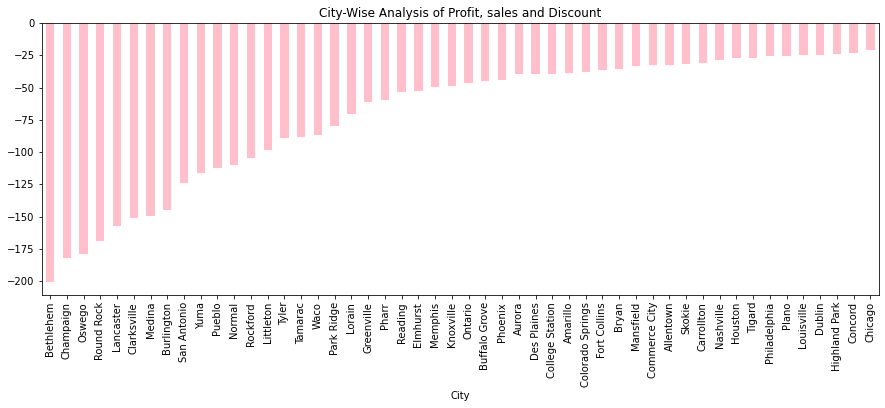

In [92]:
#Low Profit making cities ---
df_city['Profit'].head(50).plot(kind='bar',figsize=(15,5),color ='pink')
plt.title('City-Wise Analysis of Profit, sales and Discount')
plt.show()

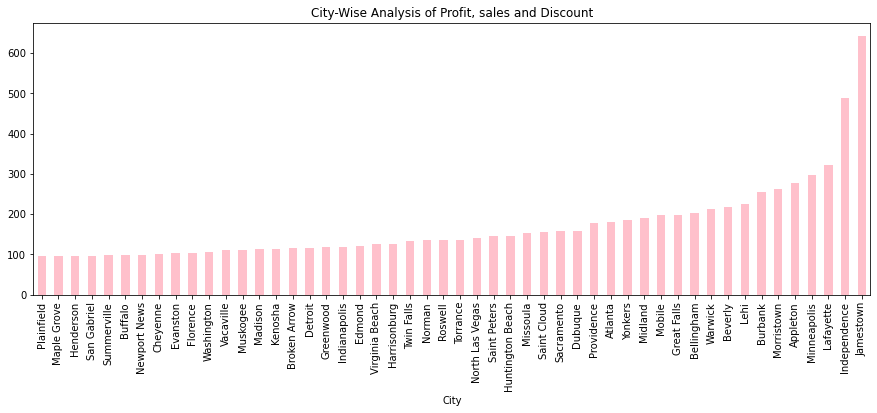

In [94]:
# high profit making cities---
df_city['Profit'].tail(50).plot(kind='bar',figsize=(15,5),color ='pink')
plt.title('City-Wise Analysis of Profit, sales and Discount')
plt.show()

*Analysis -- Bethlehem makes the lowest while Jamestown makes the highest profit respect to other cities of US.*

### X. Segment-wise Analysis of Discount, Profit, and Sales --

In [96]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [97]:
df_segment =df.groupby(['Segment'])[['Sales','Profit','Discount']].mean()
df_segment

,Sales,Profit,Discount
Segment,,,
Consumer,223.969279,25.855188,0.158308
Corporate,234.185781,30.499164,0.158159
Home Office,241.311234,33.883643,0.147178


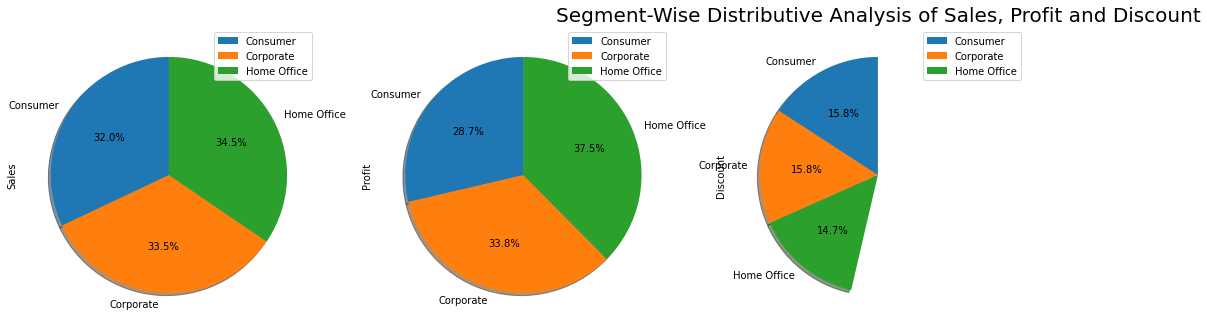

In [119]:
#1. Sales  2. Profit  3. Discount

df_segment.plot.pie(subplots=True, autopct ='%1.1f%%',figsize=(18,20),startangle=90,shadow=True,labels =df_segment.index,rotatelabels =False)
plt.title('Segment-Wise Distributive Analysis of Sales, Profit and Discount',fontsize =20,loc ='center')
plt.show()

*Analysis - Highest profit (37.5%) and sales(34.5%) have occurred in House office segment while lowest profit (28.7%) and sales (32%) in respect to other have occurred in consumer segment.*

### XI. Quantity-Wise Analysis of Sales, Discount and Profit---

In [122]:
df_quantity =df.groupby(['Quantity'])[['Sales','Profit','Discount']].mean()
df_quantity.head(10)

,Sales,Profit,Discount
Quantity,,,
1,59.234632,8.276396,0.152959
2,120.377982,16.027769,0.154844
3,175.630896,23.720306,0.153321
4,272.779827,37.227971,0.158373
5,337.936339,40.257394,0.157146
6,362.101960,18.051517,0.166556
7,395.888393,56.579163,0.161980
8,458.210802,42.244342,0.171595
9,498.083683,68.557716,0.147946


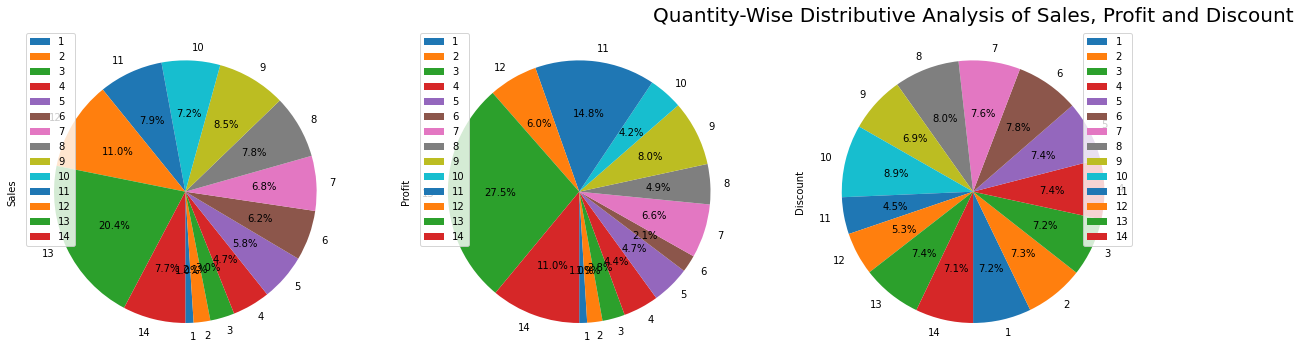

In [131]:
#1. Sales  2. Profit   3.Discount

df_quantity.plot.pie(subplots=True, autopct ='%1.1f%%',figsize=(20,20),startangle=270,shadow=False,labels =df_quantity.index,rotatelabels =False)
plt.title('Quantity-Wise Distributive Analysis of Sales, Profit and Discount',fontsize =20,loc ='center')
plt.show()

*Analysis -- 13 of quantity has the highest sales(20%) as well as profit(27.5) while 3 and 2 of quantities have no such production because of less demand although these quantities have a competitive discounts as of 13.*

### XII. Category-Wise Analysis of Sales , Discount and Profit---

In [132]:
df_category =df.groupby(['Category'])[['Sales','Profit','Discount']].mean()
df_category.head()

,Sales,Profit,Discount
Category,,,
Furniture,350.002981,8.697740,0.174027
Office Supplies,119.550107,20.353403,0.157385
Technology,452.709276,78.752002,0.132323


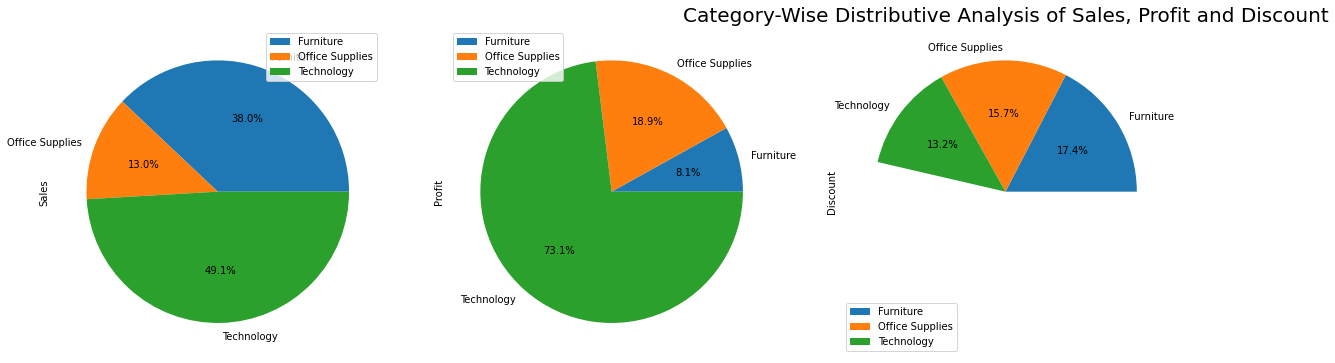

In [157]:
#1. Sales  2. Profit  3.Discount

df_category.plot.pie(subplots=True, autopct ='%1.1f%%',figsize=(20,20),shadow=False,labels =df_category.index,rotatelabels =False)
plt.title('Category-Wise Distributive Analysis of Sales, Profit and Discount',fontsize =20,loc ='center')
plt.show()

*Analysis - Maximum profit(49.1%) and sales (73.1) are obtained in Technology while minimum profit (8.1%) in Furniture as compare to its sales. since sales is low comparatively so they give heavy discount(upto 17.4%) to clear glut or ware stocks.*

### XIII. Region-Wise Distributive Analysis of the Sales, Profit, and Discount--

In [137]:
df_region =df.groupby(['Region'])[['Sales','Profit','Discount']].mean()
df_region.head()

,Sales,Profit,Discount
Region,,,
Central,215.947759,17.100421,0.240250
East,238.465798,32.163905,0.145343
South,241.803645,28.857673,0.147253
West,227.139254,33.927281,0.109615


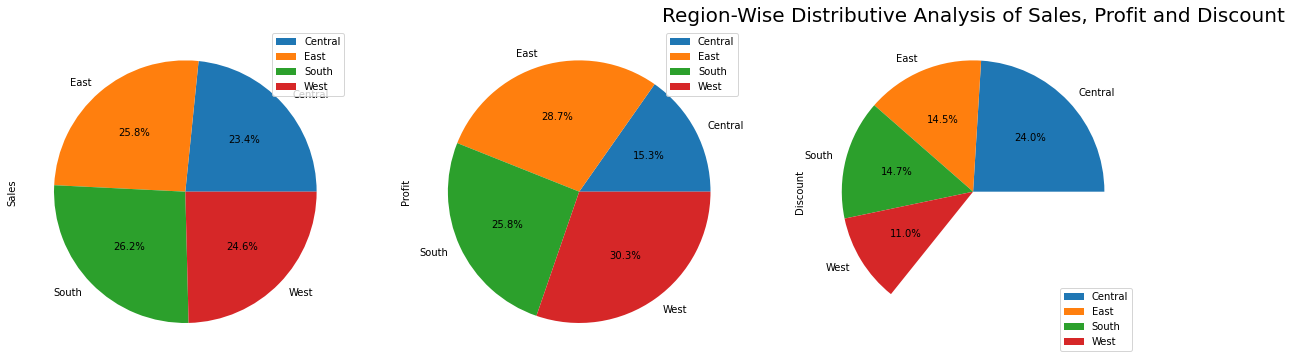

In [138]:
#1. Sales  2.Profit  3.Discount

df_region.plot.pie(subplots=True, autopct ='%1.1f%%',figsize=(20,20),shadow=False,labels =df_region.index,rotatelabels =False)
plt.title('Region-Wise Distributive Analysis of Sales, Profit and Discount',fontsize =20,loc ='center')
plt.show()

*Analysis - West region cities of US has the highest profit(30.3%) and the lowest discount(11%). Due to heavy discount of approx 24% in cities of central region that grabs 23.4% sales in the market but counter the lowest profit of just 15.3% in over all.*

### XIV. Ship Mode- Wise Distributive Analysis of Sales, Profit and Discount of US--

In [139]:
df_shipmode =df.groupby(['Ship Mode'])[['Sales','Profit','Discount']].mean()
df_shipmode.head()

,Sales,Profit,Discount
Ship Mode,,,
First Class,228.614490,31.850134,0.164587
Same Day,236.755950,29.283924,0.152675
Second Class,236.323750,29.565956,0.138626
Standard Class,227.928858,27.534715,0.160222


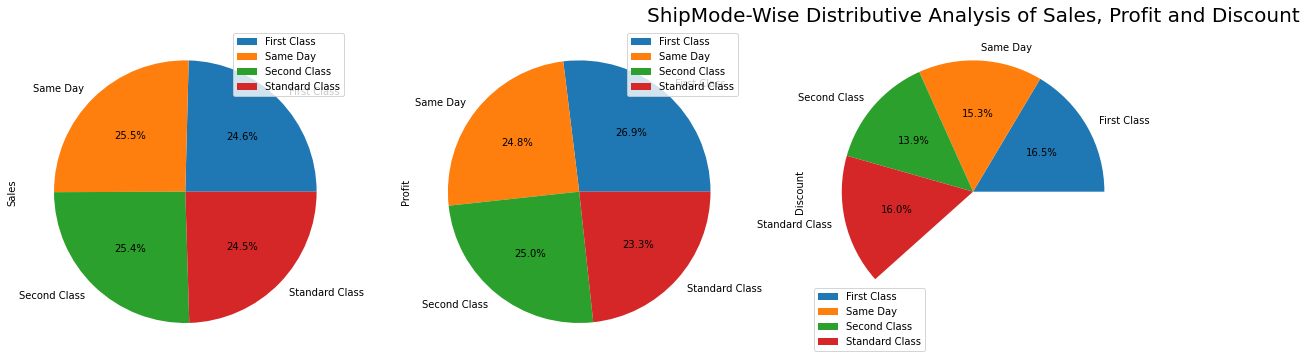

In [140]:
#1. Sales  2.Profit  3.Discount

df_shipmode.plot.pie(subplots=True, autopct ='%1.1f%%',figsize=(20,20),shadow=False,labels =df_shipmode.index,rotatelabels =False)
plt.title('ShipMode-Wise Distributive Analysis of Sales, Profit and Discount',fontsize =20,loc ='center')
plt.show()

*Analysis - (i) Profit(26.9%) and Discount(16.5%) are high comparatively for First Class while Sales are high for same day shipment.*

### XV. Sub-Category- Wise Distributive Analysis of the Sales, Profit and Discount in US --

In [142]:
df_sub_category =df.groupby(['Sub-Category'])[['Sales','Profit','Discount']].mean()
df_sub_category.head()

,Sales,Profit,Discount
Sub-Category,,,
Accessories,215.974604,54.111788,0.078452
Appliances,230.755710,38.922758,0.166524
Art,34.096896,8.207059,0.074969
Binders,133.645972,19.860710,0.372011
Bookcases,503.859633,-15.230509,0.211140


#### (A) Based on the Sales --

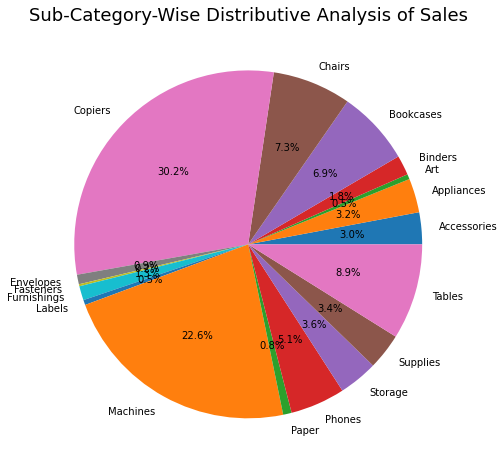

In [152]:
plt.figure(figsize=(8,8))
plt.pie(df_sub_category['Sales'], autopct ='%1.1f%%',shadow=False,labels =df_sub_category.index,rotatelabels =False)
plt.title('Sub-Category-Wise Distributive Analysis of Sales',fontsize =18,loc ='center')
plt.show()

*Analysis -- Copiers grab the market by having the highest sales of about 30.2% followed by the machine with 22.6% while Fasteners with 0.2% of the overall which is quite low. labels (0.5%), Art(0.5%),paper(0.8%), envelopes(0.9%) and Furnishings(1.3%) need to work upon and come up with creative ideas that attract consumers. However, the stocks of binder is the highest of 1522 approx but their sales are worst i.e. 1.8% which needs to be maintained.*

#### (B) Based on the Discount--

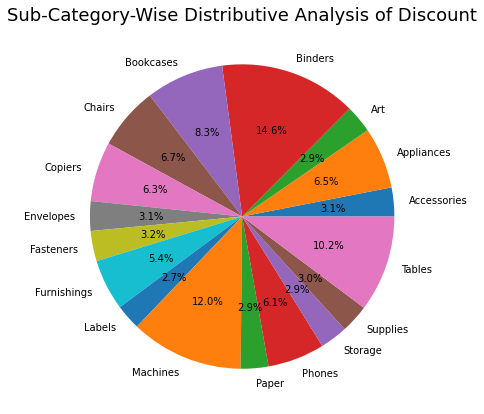

In [151]:
plt.figure(figsize=(7,7))
plt.pie(df_sub_category['Discount'], autopct ='%1.1f%%',shadow=False,labels =df_sub_category.index,rotatelabels =False)
plt.title('Sub-Category-Wise Distributive Analysis of Discount',fontsize =18,loc ='center')
plt.show()

*Analysis - As we have seen that sales are low so they provide heavy discount to clear glut but they have to make their market strategy so that they could capture the market with innovative ideas like the others have such as copier with 6.3% discount. However, labels that give least discount of 2.7%, though its sales has not picked up due to high prices of the product they sold. Moreover, Machines that has grabbed 22% of the market sales privides 12%  of discount to remain in the market.*

#### (C) Based on Profit--

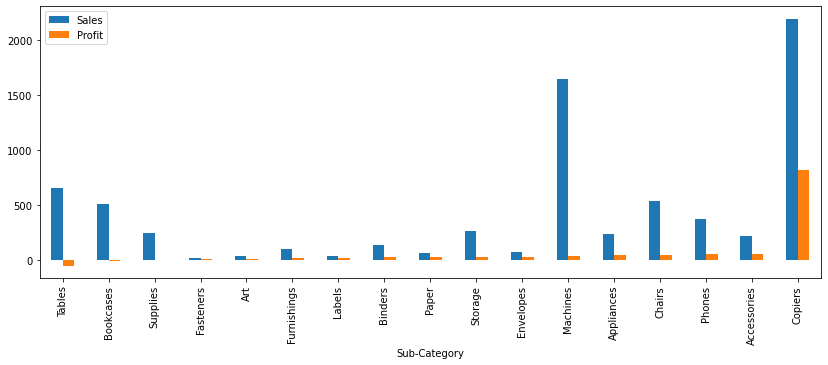

In [156]:
df_sub_category.sort_values('Profit')[['Sales','Profit']].plot(kind = 'bar',
                                                              figsize=(14,5),
                                                              label =['Avg Sales Prices($)','Profit($)'])
plt.show()

*Analysis - Amongst all, copiers has the highest profit as well as sales while Tables and Bookmarks sub-categories are faced huge loss.*

### Conclusion --

As a Business Manager, as far I can see with this data.. innovation in sub-categories will help in tackling the problems that recurring low profit as well as sales. Innovation in the sub-categories such as Art will attrack consumers so for that we have to increase the supply to the stationary shops with good and innovative products near to schools, colleges universities and offices bcz the demand for it will be never vanished since it comes under the basics help in pursuing education. Moreover, Committed to deliver the services at the fastest along with accountability of product they are selling will automatically increase the demand and trust in the market. However, there is no much difference in the region-wise sales but profit margin in cities such as Illinois(gives the highest discount), Michigan, Ohio, Wisconsin, Oklahoma, South Dakota(lowest sales of 0.8%), Texas(2nd highest in discount and deals), Alabama, kansas,, etc of central regions should specially be focus to amplify the profit in these regions as well. 


**Thank you.**